In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

warnings.filterwarnings("ignore")

df=pd.read_csv('CSGO_merge.csv')

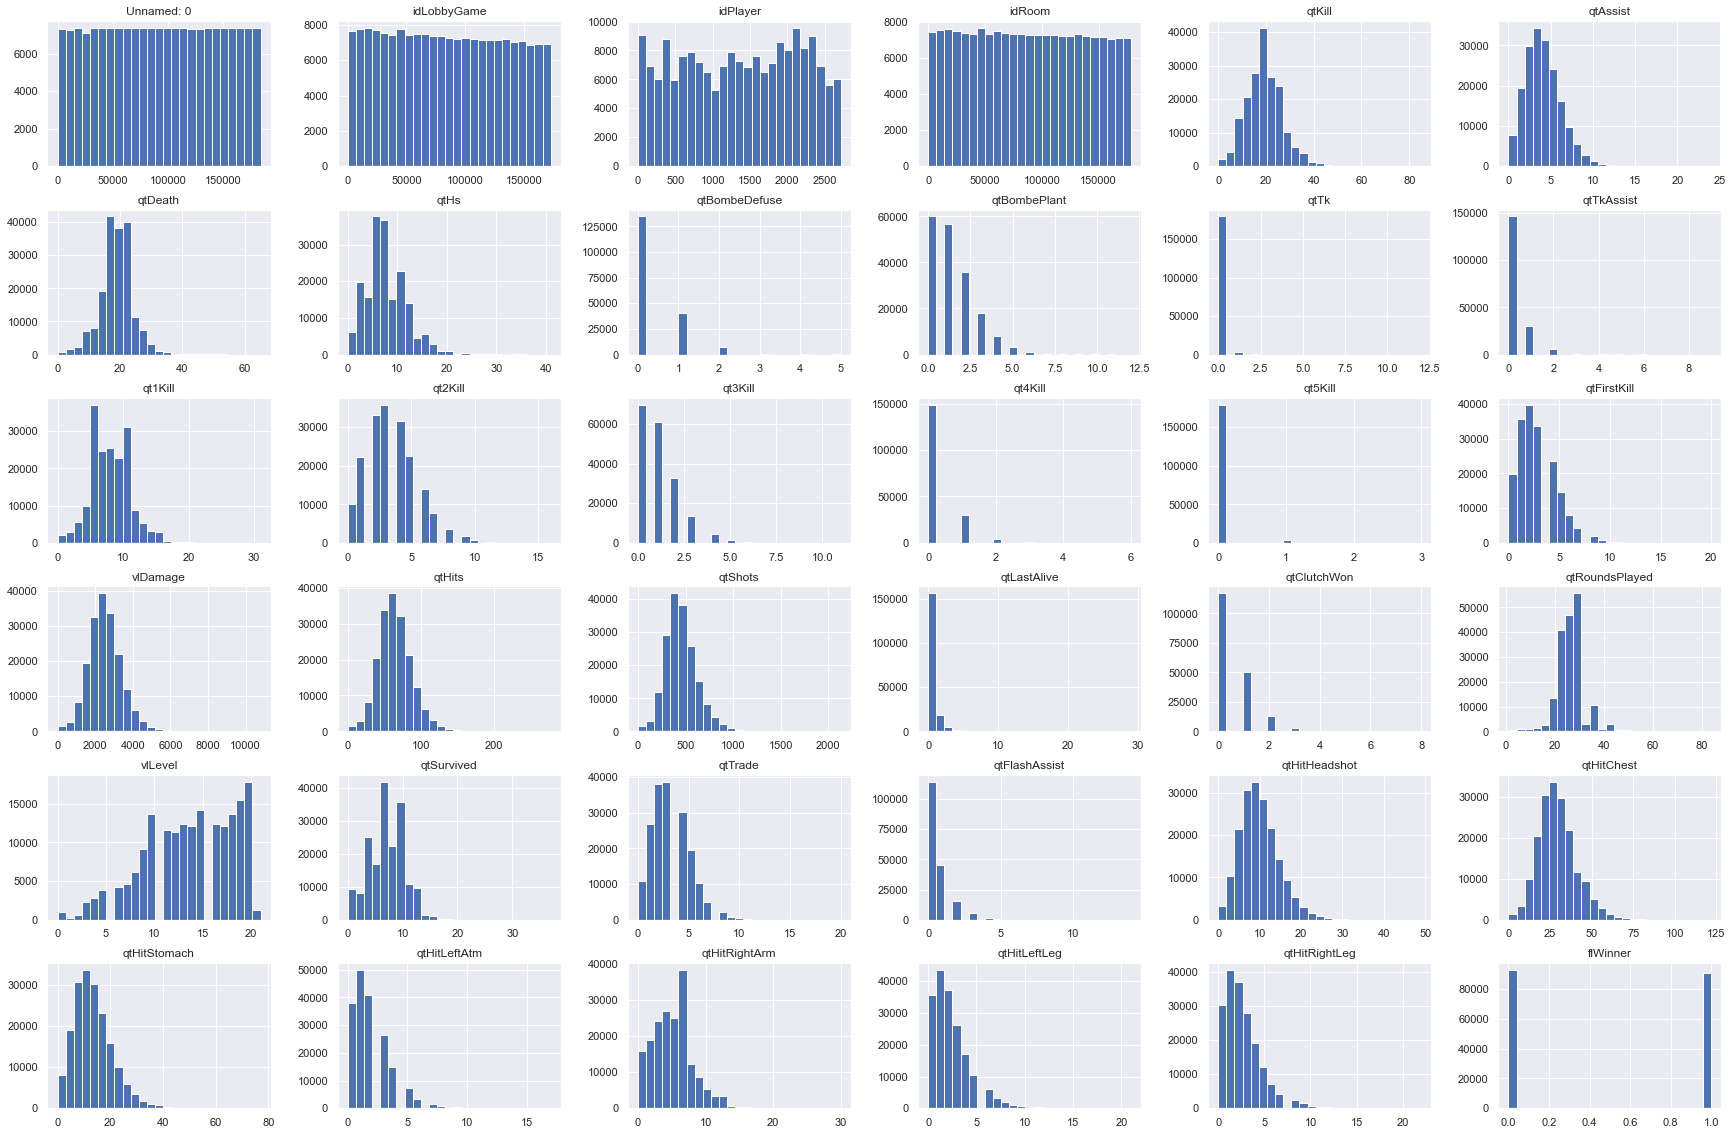

In [5]:
#Quick look Histogram
df.hist(bins=25, figsize=(30,20));

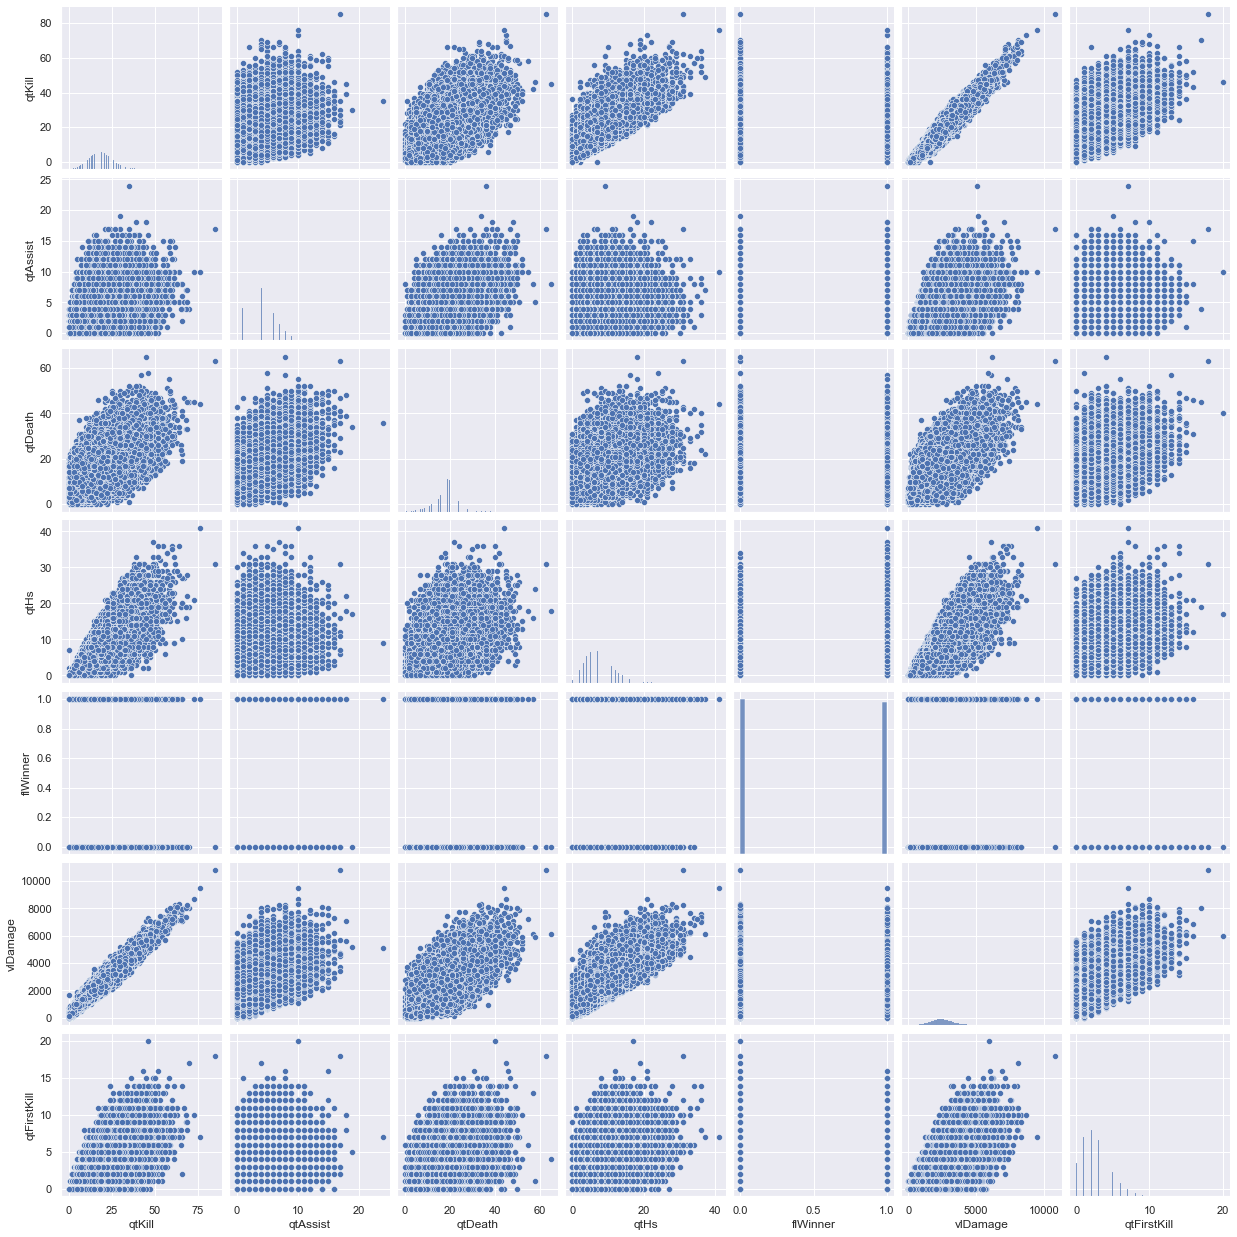

In [4]:
#scatterplot, relaçoes entre as variáveis
sns.set()
cols = ['qtKill', 'qtAssist', 'qtDeath', 'qtHs','flWinner', 'vlDamage', 'qtFirstKill' ]
sns.pairplot(df[cols], size = 2.5)
plt.show()

In [6]:
filtro = df.idRoom == 172423
df.loc[filtro]

Unnamed: 0  idLobbyGame  idPlayer  idRoom  qtKill  qtAssist  qtDeath  \
29612       30087       167226      2604  172423      25         3       17   

       qtHs  qtBombeDefuse  qtBombePlant  ...  qtHitStomach  qtHitLeftAtm  \
29612     8              0             1  ...          18.0           4.0   

       qtHitRightArm  qtHitLeftLeg  qtHitRightLeg  flWinner  \
29612            6.0           5.0            2.0         0   

               dtCreatedAt  descCountry     dtBirth       dtRegistration  
29612  2021-10-24 00:25:09           br  2001-03-05  2020-02-05 14:21:47  

[1 rows x 41 columns]

In [7]:
df_agrupado = df.groupby('idPlayer').sum()
df_agrupado['Games'] = df.groupby('idPlayer')['idRoom'].count()
df_agrupado['KD'] = df_agrupado['qtKill'] / df_agrupado['qtDeath']
df_agrupado.drop(columns =['idLobbyGame','idRoom'], inplace=True)
df_agrupado.reset_index(inplace=True)


In [8]:
player = int(input('Digite a id do Jogador. '))
filtro_selecionar_player = df_agrupado.idPlayer == player 
df_agrupado.loc[filtro_selecionar_player]  

Digite a id do Jogador.  2000


idPlayer  Unnamed: 0  qtKill  qtAssist  qtDeath  qtHs  qtBombeDefuse  \
1816      2000    15363020    1729       339     1729   679             52   

      qtBombePlant  qtTk  qtTkAssist  ...  qtHitHeadshot  qtHitChest  \
1816           146   7.0        49.0  ...          884.0      3090.0   

      qtHitStomach  qtHitLeftAtm  qtHitRightArm  qtHitLeftLeg  qtHitRightLeg  \
1816        1250.0         188.0          537.0         132.0          181.0   

      flWinner  Games   KD  
1816        45     95  1.0  

[1 rows x 36 columns]

In [9]:
df_agrupado_media = df.groupby('idPlayer').mean()
df_agrupado_media.drop(columns = ['idLobbyGame', 'idRoom'], inplace=True)
df_agrupado_media['Games'] = df.groupby('idPlayer')['idRoom'].count()
df_agrupado_media['KD'] = df_agrupado_media['qtKill'] / df_agrupado_media['qtDeath']
df_agrupado_media.reset_index(inplace=True)

In [10]:
df_agrupado_media.head()

idPlayer  Unnamed: 0     qtKill  qtAssist    qtDeath      qtHs  \
0         1         0.5  14.500000  2.000000  17.000000  4.000000   
1         2        12.0   9.714286  3.095238  20.142857  4.095238   
2         3       142.0  21.348315  3.584270  19.415730  8.292135   
3         4      1537.0   9.666667  1.333333  14.666667  3.666667   
4         5      1540.5  18.000000  4.750000  15.750000  6.750000   

   qtBombeDefuse  qtBombePlant  qtTk  qtTkAssist  ...  qtHitHeadshot  \
0       0.000000      2.000000  0.00    0.500000  ...       5.000000   
1       0.047619      1.380952  0.00    0.142857  ...       5.666667   
2       0.449438      1.483146  0.00    0.157303  ...      10.707865   
3       0.333333      0.333333  0.00    0.000000  ...       4.333333   
4       0.750000      2.250000  0.25    0.000000  ...       9.750000   

   qtHitChest  qtHitStomach  qtHitLeftAtm  qtHitRightArm  qtHitLeftLeg  \
0   19.500000      9.000000      2.000000       1.500000      1.000000   
1   15.857143     11.285714      1.380952       3.095238      2.809524   
2   34.359551     15.786517      1.910112       5.606742      2.123596   
3   11.666667      7.000000      1.333333       4.333333      2.000000   
4   31.000000     15.750000      2.750000       4.750000      2.500000   

   qtHitRightLeg  flWinner  Games        KD  
0       1.500000  0.500000      2  0.852941  
1       2.904762  0.380952     21  0.482270  
2       2.325843  0.505618     89  1.099537  
3       1.000000  0.333333      3  0.659091  
4       2.000000  0.250000      4  1.142857  

[5 rows x 36 columns]

In [12]:
player = int(input('Digite a id do Jogador. '))
filtro_selecionar_player1 = df_agrupado_media.idPlayer == player 
df_agrupado_media.loc[filtro_selecionar_player1]

Digite a id do Jogador.  2001


idPlayer  Unnamed: 0     qtKill  qtAssist    qtDeath      qtHs  \
1817      2001    127958.0  18.076596  3.791489  18.187234  5.944681   

      qtBombeDefuse  qtBombePlant      qtTk  qtTkAssist  ...  qtHitHeadshot  \
1817       0.259574      1.625532  0.021277    0.106383  ...        7.67234   

      qtHitChest  qtHitStomach  qtHitLeftAtm  qtHitRightArm  qtHitLeftLeg  \
1817    26.33617     19.995745      1.906383       5.144681      4.408511   

      qtHitRightLeg  flWinner  Games        KD  
1817       5.314894  0.502128    235  0.993917  

[1 rows x 36 columns]

In [74]:
#Jogador com a melhor média de KD, com numero de jogos significativo e com melhor média de vitorias.  

df_agrupado_media.sort_values(by='Games', ascending=False, inplace=True)
filtro = (df_agrupado_media.Games > 40) & (df_agrupado_media.KD > 1) & (df_agrupado_media.flWinner > 0.8)
df_agrupado_media.loc[filtro]

idPlayer     qtKill  qtAssist    qtDeath      qtHs  qtBombeDefuse  \
500       552  25.188119  4.168317  16.277228  9.465347       0.277228   

     qtBombePlant      qtTk  qtTkAssist   qt1Kill  ...  qtHitHeadshot  \
500       0.70297  0.009901    0.257426  8.514851  ...      12.029703   

     qtHitChest  qtHitStomach  qtHitLeftAtm  qtHitRightArm  qtHitLeftLeg  \
500    35.80198     17.633663      1.940594       6.029703           3.0   

     qtHitRightLeg  flWinner  Games        KD  
500       3.049505   0.80198    101  1.547445  

[1 rows x 35 columns]

In [80]:
# Vamos analisar os 10 melhores segundo oas metricas escolhidas, KD, Medias de vitorias e numero de jogos  
df_agrupado_media.sort_values(by='Games', ascending=False, inplace=True)
filtro1 = (df_agrupado_media.flWinner > 0.6)
filtro2 = (df_agrupado_media.KD > 1)
filtro3 = (df_agrupado_media.Games > 100) 
df_agrupado_media.loc[filtro1 & filtro2 & filtro3]

idPlayer     qtKill  qtAssist    qtDeath       qtHs  qtBombeDefuse  \
1745      1922  27.406644  4.579611  17.520046   8.977090       0.325315   
352        389  24.064961  3.870079  17.700787  14.257874       0.244094   
1706      1874  22.486216  3.786967  18.904762  11.218045       0.295739   
2160      2375  25.972789  3.792517  17.976190  14.914966       0.316327   
2093      2304  19.959854  3.609489  16.649635   8.193431       0.350365   
2159      2374  23.608527  3.496124  17.069767   9.546512       0.337209   
962       1062  24.085106  3.710638  18.455319  13.523404       0.263830   
184        206  22.852174  4.247826  18.956522   8.608696       0.330435   
1798      1980  21.072539  4.450777  16.772021   8.072539       0.663212   
45          50  20.961783  3.369427  18.114650  10.114650       0.343949   
1090      1206  18.202614  3.673203  17.450980   7.058824       0.326797   
2064      2273  21.369128  3.812081  18.751678   8.852349       0.295302   
238        263  24.410853  2.945736  14.511628   7.899225       0.263566   
715        782  17.937500  3.976562  15.226562   6.734375       0.218750   
1219      1346  21.245763  4.322034  18.127119   8.872881       0.288136   
957       1056  24.562500  3.196429  18.812500   9.625000       0.160714   
2441      2685  20.081081  4.441441  18.486486   7.567568       0.396396   
882        967  19.663462  3.961538  18.557692   7.586538       0.211538   
500        552  25.188119  4.168317  16.277228   9.465347       0.277228   

      qtBombePlant      qtTk  qtTkAssist   qt1Kill  ...  qtHitHeadshot  \
1745      1.030928  0.059565    0.743414  8.589920  ...      11.027491   
352       0.962598  0.015748    0.468504  8.108268  ...      16.848425   
1706      1.000000  0.025063    0.443609  8.503759  ...      14.077694   
2160      0.748299  0.020408    0.428571  8.159864  ...      17.523810   
2093      1.565693  0.007299    0.562044  8.357664  ...      10.339416   
2159      1.062016  0.023256    0.527132  8.248062  ...      11.054264   
962       1.072340  0.008511    0.472340  8.076596  ...      16.374468   
184       1.286957  0.034783    0.504348  8.273913  ...      11.547826   
1798      2.321244  0.020725    0.632124  8.544041  ...      10.518135   
45        2.076433  0.006369    0.286624  8.063694  ...      12.000000   
1090      0.986928  0.013072    0.228758  8.065359  ...       8.339869   
2064      0.892617  0.026846    0.187919  8.395973  ...      11.275168   
238       1.635659  0.007752    0.511628  7.697674  ...       9.263566   
715       0.437500  0.023438    0.062500  7.320312  ...       7.984375   
1219      1.423729  0.008475    0.254237  8.338983  ...      11.296610   
957       1.928571  0.017857    0.616071  9.312500  ...      11.339286   
2441      0.810811  0.009009    0.243243  8.270270  ...       9.342342   
882       0.730769  0.009615    0.173077  7.971154  ...       9.682692   
500       0.702970  0.009901    0.257426  8.514851  ...      12.029703   

      qtHitChest  qtHitStomach  qtHitLeftAtm  qtHitRightArm  qtHitLeftLeg  \
1745   40.087056     19.233677      2.261168       7.069874      2.751432   
352    32.301181      8.911417      1.555118       5.466535      1.234252   
1706   36.842105     11.385965      2.105263       5.864662      1.749373   
2160   32.261905      7.945578      1.659864       4.965986      1.132653   
2093   32.302920     10.372263      1.766423       5.211679      1.237226   
2159   27.755814     10.217054      1.410853       4.271318      1.418605   
962    30.165957      8.434043      1.429787       4.195745      1.114894   
184    38.839130     17.595652      2.430435       6.369565      2.647826   
1798   29.880829     10.756477      1.901554       4.943005      1.761658   
45     26.566879      9.191083      1.484076       4.324841      1.605096   
1090   28.601307     13.287582      1.620915       4.901961      1.725490   
2064   32.187919     12.671141      1.758389       5.389262      1.993289   
238

In [ ]:
#visualizar a evolucao do player 1922

<Figure size 1080x360 with 0 Axes>

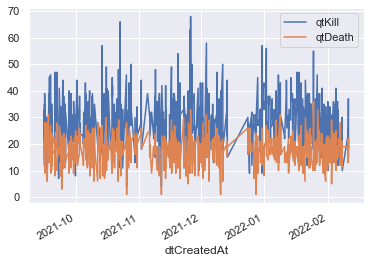

In [89]:
plt.figure(figsize=(15,5))

filtro = df.idPlayer == 1922
player1922 = df.loc[filtro]

ax = player1922.plot(x='dtCreatedAt',y='qtKill', kind= 'line')
player1922.plot(x='dtCreatedAt',y='qtDeath', kind='line', ax=ax)

plt.show()

<Figure size 1080x360 with 0 Axes>

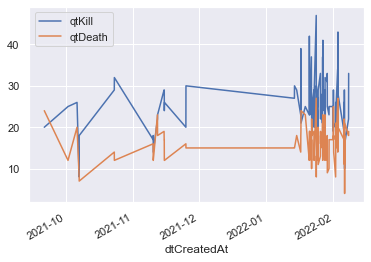

In [94]:
plt.figure(figsize=(15,5))

filtro = df.idPlayer == 552
player552 = df.loc[filtro]

ax = player552.plot(x='dtCreatedAt',y='qtKill', kind= 'line')
player552.plot(x='dtCreatedAt',y='qtDeath', kind='line', ax=ax)

plt.show()

In [133]:
df_agrupado_media.head(2).T

1745         1510
idPlayer        1922.000000  1663.000000
qtKill            27.406644    16.714477
qtAssist           4.579611     3.611260
qtDeath           17.520046    18.896783
qtHs               8.977090     6.697051
qtBombeDefuse      0.325315     0.331099
qtBombePlant       1.030928     1.328418
qtTk               0.059565     0.009383
qtTkAssist         0.743414     0.225201
qt1Kill            8.589920     7.906166
qt2Kill            5.022910     2.963807
qt3Kill            2.012600     0.774799
qt4Kill            0.572738     0.121984
qt5Kill            0.082474     0.012064
qtFirstKill        4.194731     2.225201
vlDamage        3517.121420  2242.235925
qtHits            85.443299    56.867292
qtShots          595.234822   367.730563
qtLastAlive        0.950745     0.576408
qtClutchWon        0.829324     0.458445
qtRoundsPlayed    26.824742    26.865952
vlLevel           20.619702    17.179625
qtSurvived         8.355097     7.189008
qtTrade            2.877434     3.178284
qtFlashAssist      1.666667     0.592493
qtHitHeadshot     11.027491     8.286863
qtHitChest        40.087056    26.044236
qtHitStomach      19.233677    12.217158
qtHitLeftAtm       2.261168     1.687668
qtHitRightArm      7.069874     4.561662
qtHitLeftLeg       2.751432     1.924933
qtHitRightLeg      3.012600     2.144772
flWinner           0.617411     0.517426
Games            873.000000   746.000000
KD                 1.564302     0.884514

In [136]:
# para a analise ser valida, considerarei apenas jogadores com mais de 10 jogos. 
filtro = (df_agrupado_media.Games > 30)
df_agrupado_media = df_agrupado_media.loc[filtro]


In [123]:
#scatterplot
sns.set()
cols = ['qtKill', 'qtAssist', 'qtDeath', 'KD', 'flWinner', 'qtShots']
sns.pairplot(data=df_agrupado_media, x_vars=cols, y_vars=['Games', 'KD', 'flWinner','qtShots'])
plt.show()

TypeError: pairplot() got an unexpected keyword argument 'alpha'

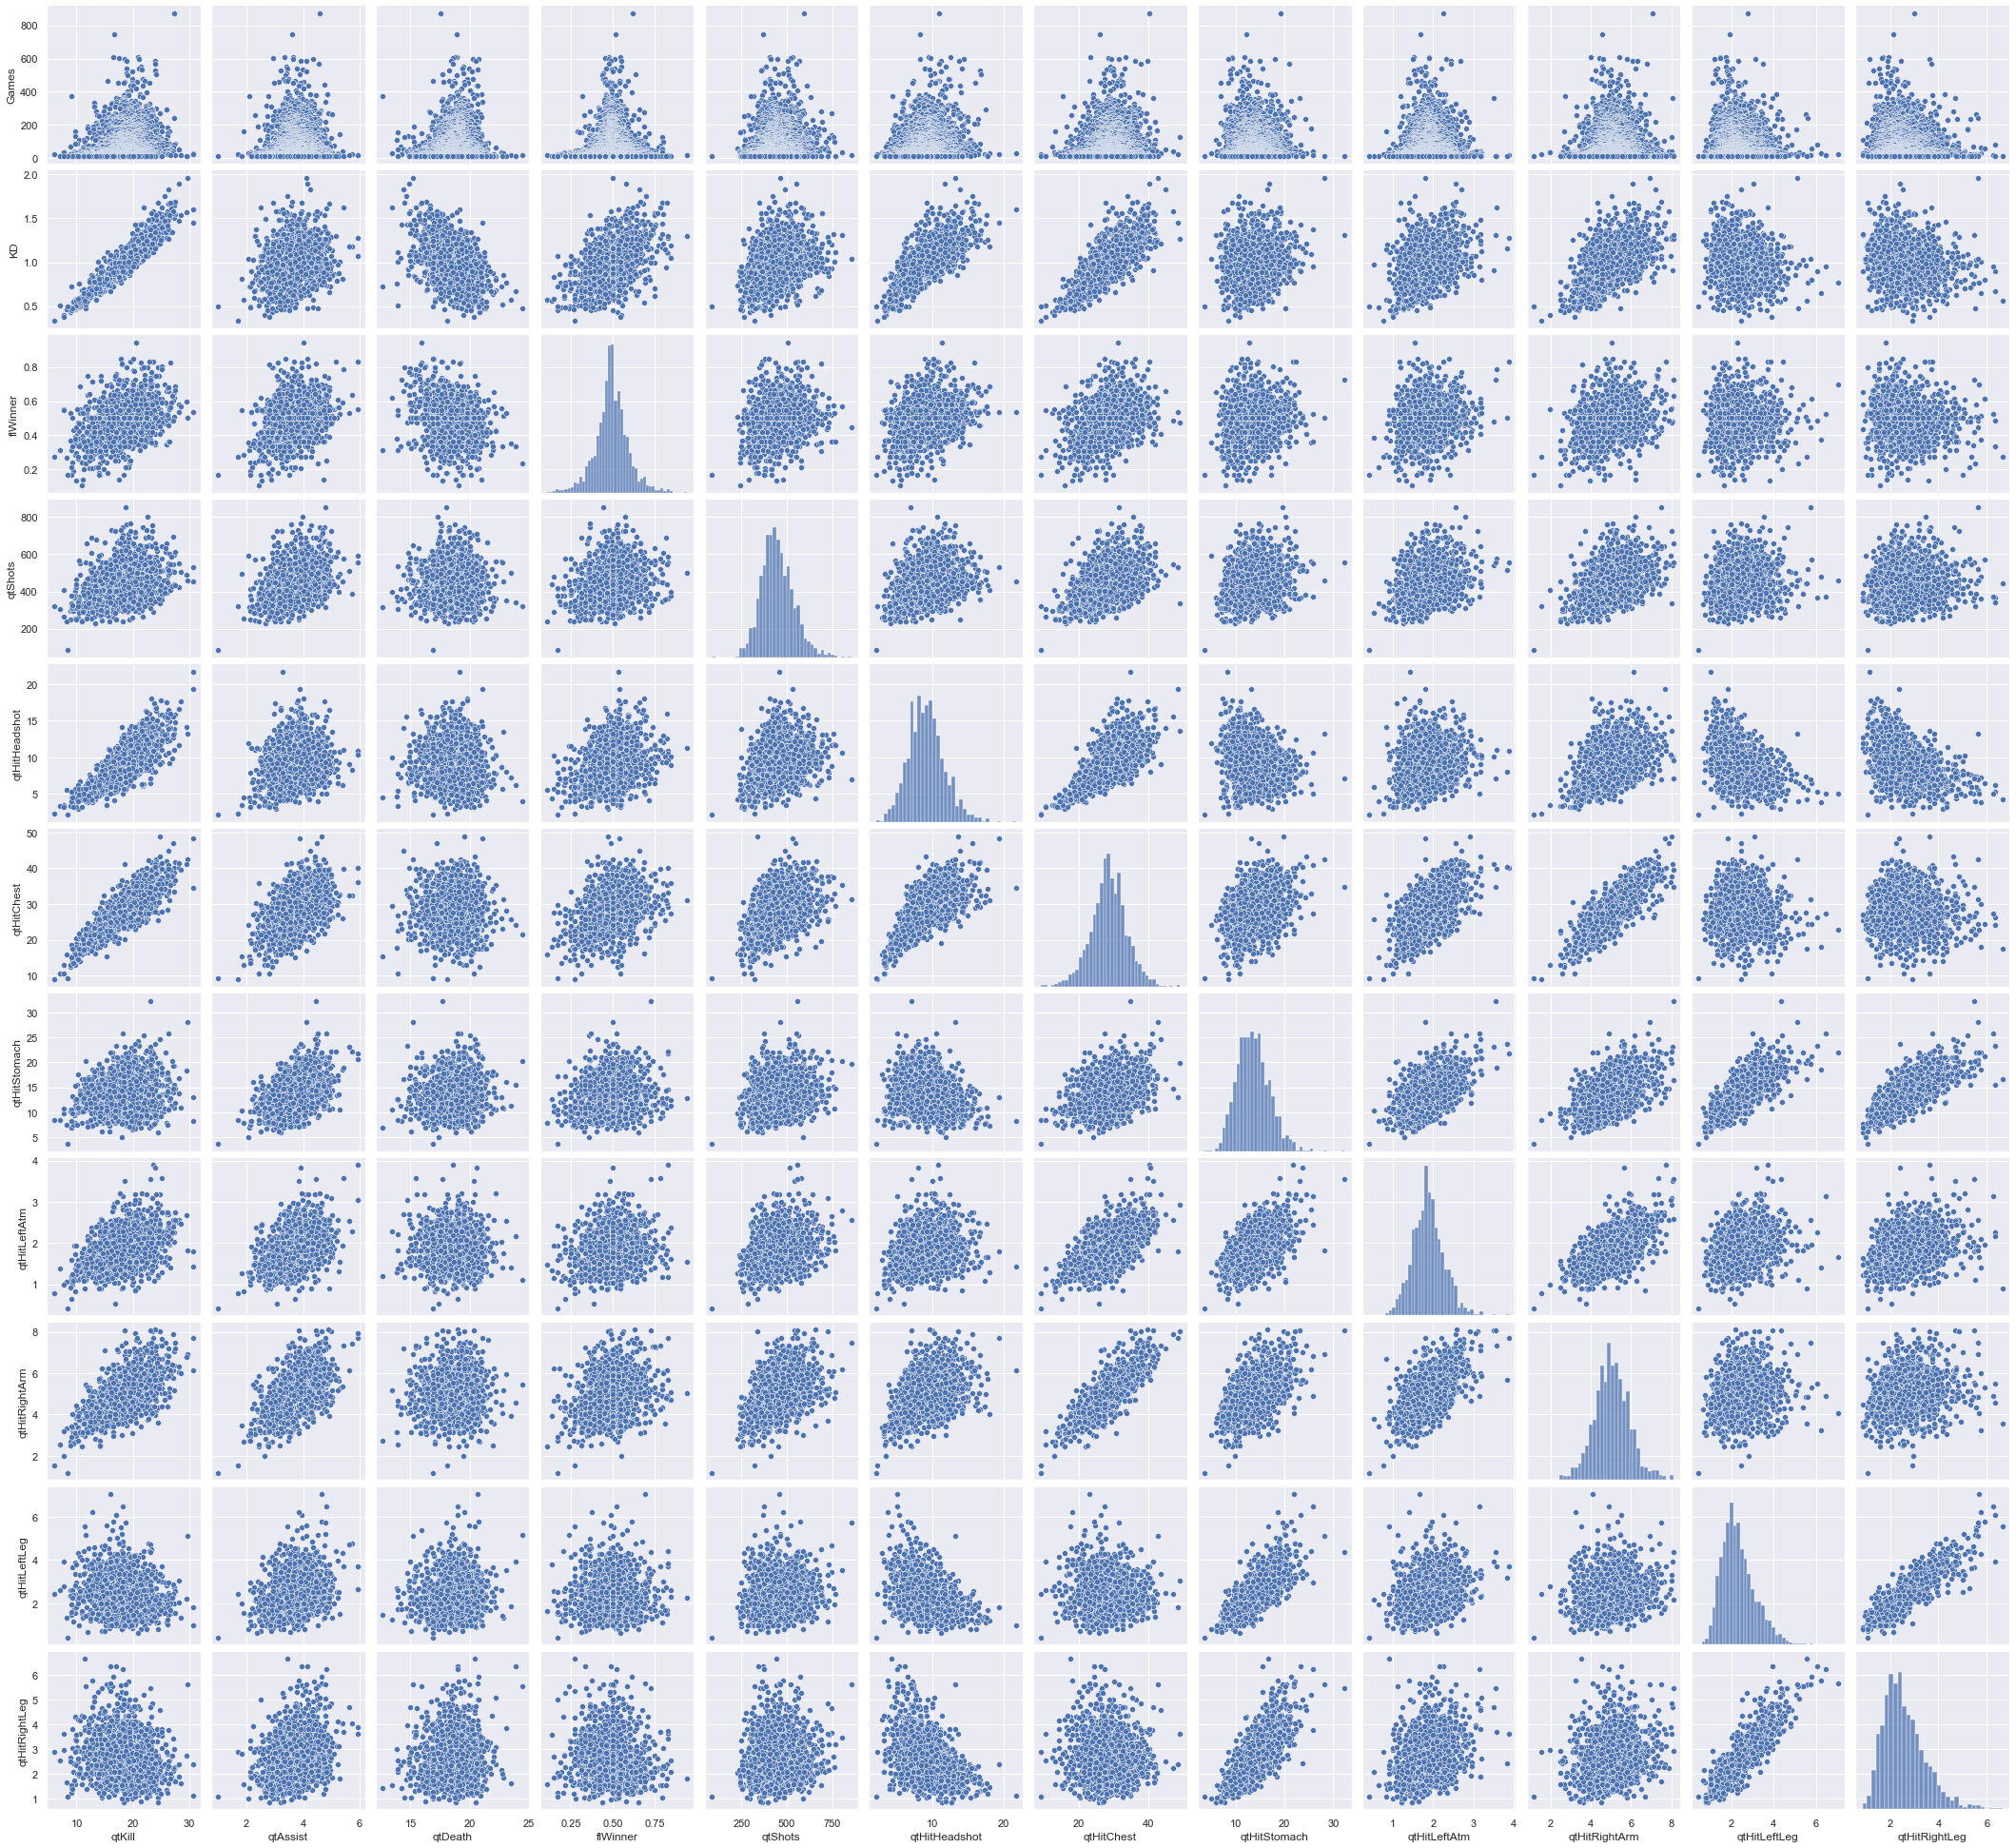

In [125]:
#scatterplot
sns.set()
cols = ['qtKill', 'qtAssist', 'qtDeath', 'flWinner', 'qtShots','qtHitHeadshot',
        'qtHitChest', 'qtHitStomach', 'qtHitLeftAtm', 'qtHitRightArm', 'qtHitLeftLeg', 'qtHitRightLeg']
sns.pairplot(data=df_agrupado_media, x_vars=cols, y_vars=['Games', 'KD', 'flWinner','qtShots','qtHitHeadshot','qtHitChest',
                                                          'qtHitStomach','qtHitLeftAtm', 'qtHitRightArm', 'qtHitLeftLeg', 'qtHitRightLeg' ])
plt.show()

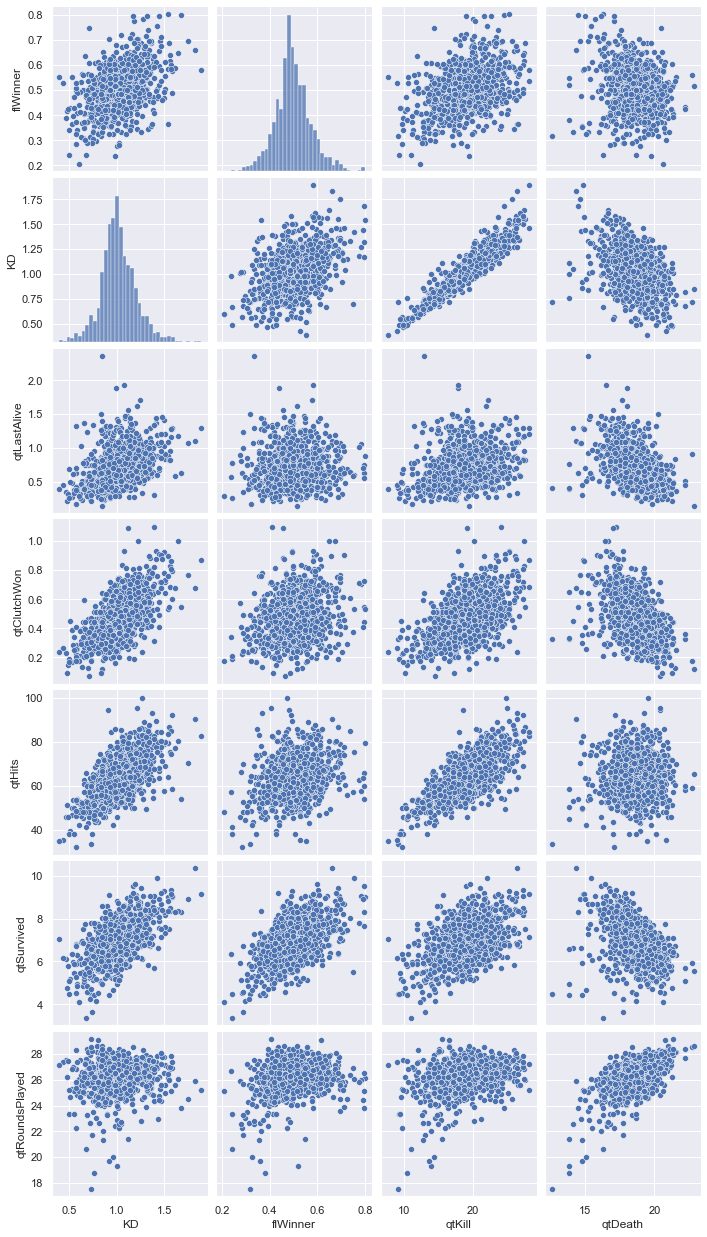

In [138]:
#scatterplot
sns.set()
cols = ['KD', 'flWinner', 'qtKill', 'qtDeath']
sns.pairplot(data=df_agrupado_media, x_vars=cols, y_vars=['flWinner', 'KD','qtLastAlive', 'qtClutchWon', 'qtHits', 'qtSurvived','qtRoundsPlayed'])
plt.show()

In [143]:
df_metricas  = df[['idPlayer']]

In [149]:
df_metricas['ADR'] = df['vlDamage'] / df['qtRoundsPlayed']
df_metricas['DPR'] = df['qtDeath'] / df['qtRoundsPlayed']
df_metricas['KPR'] = df['qtKill'] / df['qtRoundsPlayed']
df_metricas['KDD'] = df['qtKill'] - df['qtDeath']
df_metricas['APT'] = df['qtHits'] / df['qtShots']
df_metricas['Venceu'] = df['flWinner']
df_metricas['Pais'] = df['descCountry']
df_metricas['Data'] = df['dtCreatedAt']

METRICAS CSGO

ADR média de dano por round - vlDamage / qtRoundsPlayed
 
DPR media de mortes por round - qtDeath / qtRoundsPlayed

KPR média de abates por round - qtKill / qtRoundsPlayed

KDD é a diferença entre abates e mortes no fim de uma série - qtKill - qtDeath

In [152]:
df_metricas.head()

idPlayer         ADR       DPR       KPR  KDD       APT  Venceu Pais  \
0         1   53.588235  0.941176  0.294118  -11  0.117925       0   cl   
1         1  108.629630  0.666667  0.888889    6  0.090452       1   cl   
2         2   44.680000  0.920000  0.240000  -17  0.149758       0   br   
3         2   56.533333  0.866667  0.266667  -18  0.157407       0   br   
4         2   60.150000  0.550000  0.500000   -1  0.061625       1   br   

                 Data  
0 2022-01-21 19:45:44  
1 2022-02-04 02:09:47  
2 2021-09-18 18:07:43  
3 2021-09-27 00:17:45  
4 2021-09-29 22:05:47

<Figure size 1080x360 with 0 Axes>

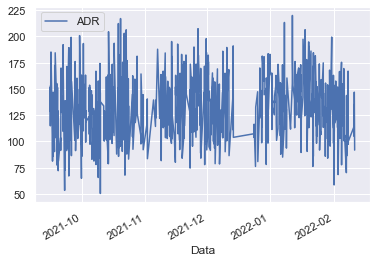

In [156]:
plt.figure(figsize=(15,5))

filtro = df_metricas.idPlayer == 1922
player1922 = df_metricas.loc[filtro]

player1922.plot(x='Data',y='ADR', kind= 'line')

plt.show()

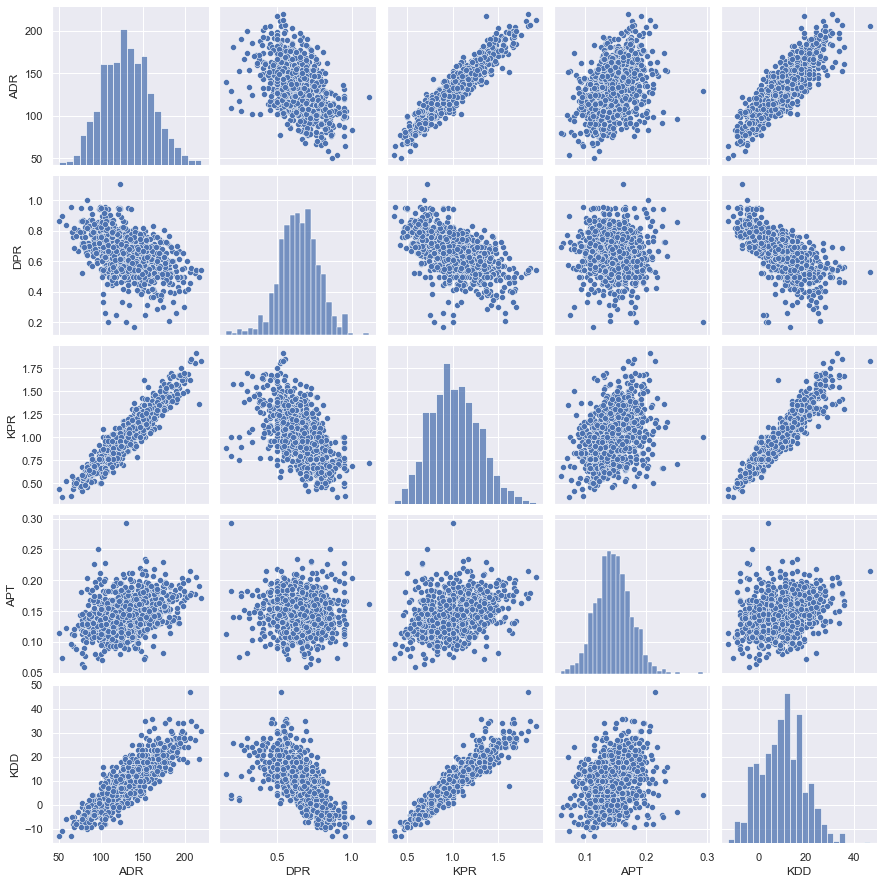

In [161]:
#scatterplot entre as métricas
sns.set()
cols = ['ADR', 'DPR', 'KPR', 'APT' , 'KDD']
sns.pairplot(data=player1922, y_vars=cols, x_vars=cols)
plt.show()

In [162]:
df_metricas2 = df_metricas.groupby('idPlayer').mean()

In [166]:
df_metricas2['Games'] = df.groupby('idPlayer')['idRoom'].count()
df_metricas2.reset_index(inplace=True)

In [167]:
df_metricas2.head()

idPlayer         ADR       DPR       KPR        KDD       APT    Venceu  \
0         1   81.108932  0.803922  0.591503  -2.500000  0.104188  0.500000   
1         2   63.342951  0.844100  0.413613 -10.428571  0.143539  0.380952   
2         3   95.261583  0.703270  0.766299   1.932584  0.169127  0.505618   
3         4   60.785660  0.707857  0.484363  -5.000000  0.124920  0.333333   
4         5  105.303197  0.698628  0.805240   2.250000  0.218381  0.250000   

   Games  
0      2  
1     21  
2     89  
3      3  
4      4

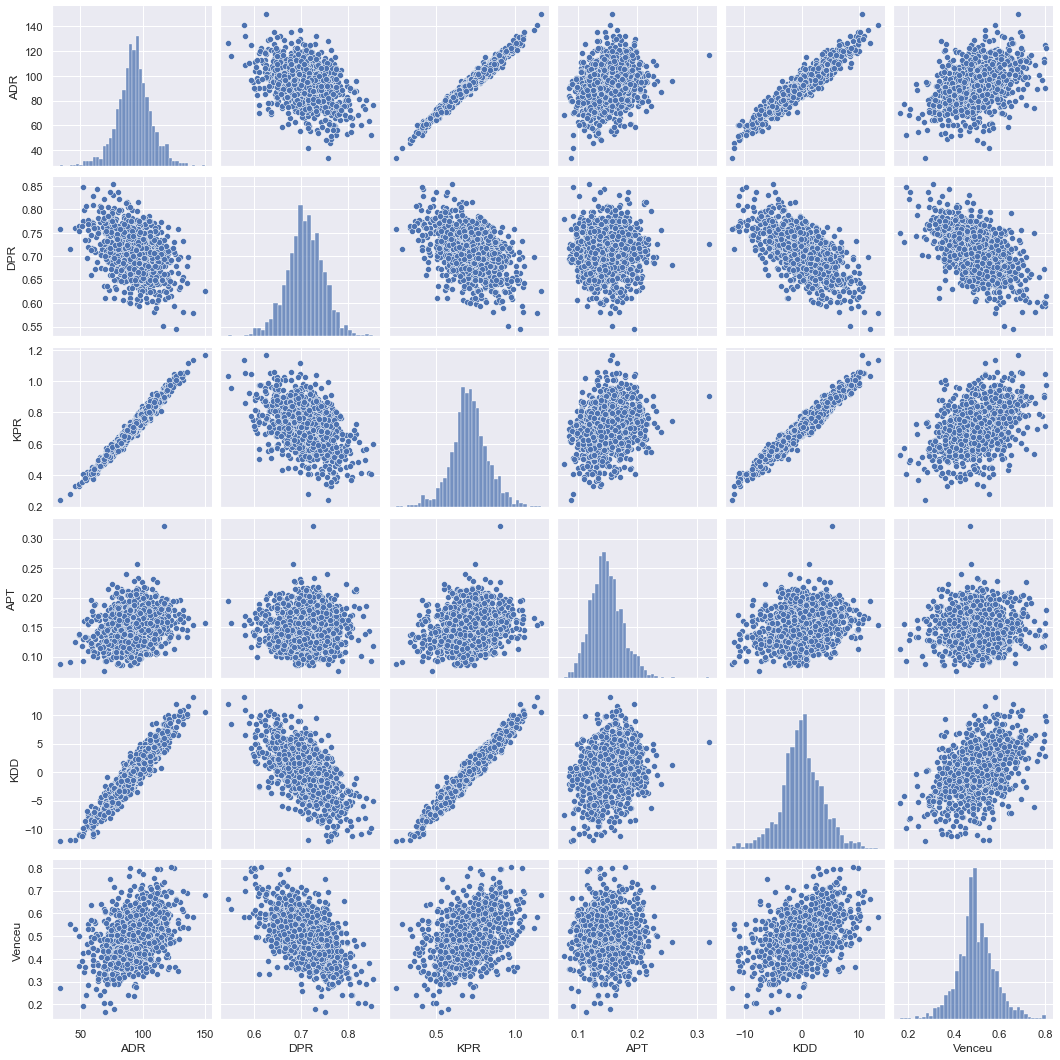

In [172]:
#Relaçao entre as métricas com jogadores com mais de 20 jogos.
filtro = df_metricas2.Games > 20
dados = df_metricas2.loc[filtro] 
#scatterplot
sns.set()
cols = ['ADR', 'DPR', 'KPR', 'APT' , 'KDD', 'Venceu']
sns.pairplot(data=dados, y_vars=cols, x_vars=cols)
plt.show()